In [1]:
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import load_model


In [4]:
model=load_model('face_recognition.h5')

In [5]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img



In [6]:
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))



In [44]:
epsilon = 0.1

def verifyFace(img1, img2):
    img1_representation = model.predict(preprocess_image('%s' % (img1)))[0,:]
    img2_representation = model.predict(preprocess_image('%s' % (img2)))[0,:]
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    
    print("Cosine similarity: ",cosine_similarity)
    
    if(cosine_similarity < epsilon):
        print("verified... they are same person")
        f = plt.figure()
        f.add_subplot(1,2,1)
        plt.imshow(load_img('%s' % (img1)))
        plt.xticks([]); plt.yticks([])
        f.add_subplot(1,2, 2)
        plt.imshow(load_img('%s' % (img2)))
        plt.xticks([]); plt.yticks([])
        plt.show(block=True)
        
        return 1
    else:
        return 0
    
    


In [7]:
import os
from tensorflow.keras.utils import load_img,save_img, img_to_array
from PIL import Image

In [25]:
def compare_images(img_path,data):
    
    if verifyFace(img_path,data["face"]):
        return sys.loc[sys['face']==data['face']]
        
    return 0
    


C:\Users\VISTA FOUNDATION\AppData\Local\Temp\ipykernel_14416\4163307478.py:7: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  records_sys = sys.to_dict('record')


Cosine similarity:  0.4679643511772156
Cosine similarity:  0.4679643511772156
Cosine similarity:  0.6506108343601227
Cosine similarity:  0.02283269166946411
verified... they are same person


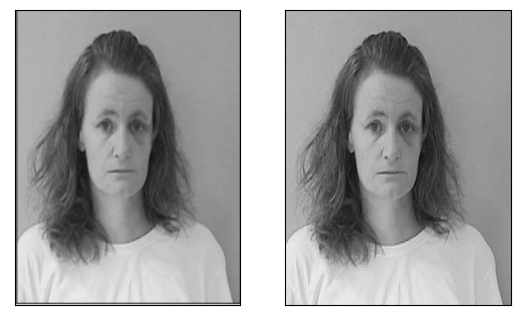

this person exists in the system 
name:   f_name          l_name
2    هدى  ماهر بدر محبوب


In [43]:
import pandas as pd

sys=pd.read_csv('system.csv').loc[:,["f_name","l_name","face","ssn"]]
sys=sys.astype(str)


records_sys = sys.to_dict('record')

flag=compare_images("face.jpg",records_sys[0])
for record in records_sys:
    if type(flag)==int:
        flag=compare_images("face.jpg",record)
    else:
        print("this person exists in the system ")
        print(f"name: {flag.iloc[:,0:2]}")
        break
    
    